Bu veri setinde, bir otele gelen rezervasyonlar hakkında bilgiler ve rezervasyonun iptal olup olmama durumu verilmiştir. Burada amaç, yeni gelen başka bir rezervasyonun verilen bilgilere göre iptal olup olmayacağını tahmin etmektir.

In [83]:
#Burada veri setini manipüle edebilmek için gerekli kütüphaneleri yüklüyoruz.
import numpy as pd
import pandas as pd

In [84]:
#veri setinin tutulduğu csv dosyasını pandas kütüphanesinin
#read_csv fonksiyonu ile okuyoruz.
data = pd.read_csv("hotel_bookings.csv") 

In [85]:
#veri setinin yapısına genel bir bakış için head fonksiyonunu kullanıyoruz.
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [86]:
#veri setinde kaç satır ve kaç sütun olduğunu öğrenmek için
#bu fonksiyonları kullanıyoruz
print("Satır sayısı:", data.shape[0])
print("Sütun sayısı:", data.shape[1])

Satır sayısı: 119390
Sütun sayısı: 32


Shape, veri seti matrisinin boyutunu bize verir.
data.shape kodunu çalıştırdığımızda bize (119390,32) değerini verecektir.


In [87]:
data.shape

(119390, 32)

Burada 119390 veri seti matrisinin satır sayısını, 32 ise sütun sayısını verir.

data.shape[0] fonksiyonunu çalıştırdığımızda (119390,32) değerinde 0'ıncı index olan,
119390 değerini alırız, bu da bize satır sayısını verir. Aynı şekilde sütun sayısını öğrenmek
için data.shape[1] fonksiyonunu kullanırız.

In [88]:
#veri setindeki her bir özelliğin (sütunun) özelliklerini öğrenmek için,
#info() fonkisyonu kullanırız.
#
#Bu fonksiyon her bir sütunun adını, içinde kaç tane dolu satır olduğunu ve
#sütunun tipini (kategorik, sürekli, tam sayı vb.) bize söyler.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Görüldüğü üzere veri setimizde 32 adet sütun vardır. Bu sütunlardan 4 tanesi float, 16 tanesi int64 
ve 12 tanesi kategorik verilere sahiptir.

In [89]:
#bu fonksiyon ile veri setinde her bir sütunun kaç tane eksik değer barındırdığını öğrenmek için kullanırız
missing_values=data.isna().sum()
missing_values

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [90]:
missing_values = missing_values[missing_values > 0]
print(missing_values)

children         4
country        488
agent        16340
company     112593
dtype: int64


Görüldüğü üzere "children" sütununda 4 tane, aynı şekilde "country" 488 ,"agent"  16340 ve "company" sütununda 112593 tane
eksik değer mevcuttur.
#
Eksik değerler üzerinde ne gibi işlemler yapacağımız bize kalmıştır.
bu konu hakkında detaylı bilgiye
https://umutcindiloglu.com/eksik-veriler-icin-izlenecek-yol/ 
adresinden ulaşabilirsiniz.

In [91]:
#Eksik verilerin toplam veri üzerinde yüzdelik oranını bulmak için bu kodları kullanabiliriz.
missing_percent = (missing_values / len(data)) * 100
print(missing_percent)

children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64


In [92]:
#Company sütununda çok fazla eksik veri olduğundan dolayı, o sütunu komple silebiliriz.
data = data.drop(['company'], axis = 1)

In [93]:
#chilren sütünunda boş olan kısımları 0 çocuk olduğunu belirtmek için "0" ile doldurabiliriz.
data["children"] = data["children"].fillna(0)

In [94]:
#"country" ve "agent" kısmında bulunan eksik verileri temizlemek için ise, eksik veri bulunan sütunları silebiliriz.
data=data.dropna(subset=['agent', 'country'])

In [95]:
#görüldüğü üzere veri setimizde herhangi bir eksik veri kalmamıştır.
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [96]:
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06


In [97]:
#veri setini incelediğmiizde "reservation_status_date" sütununun type'ını object olarak görüyoruz. Bunu tarih olarak değiştirmeliyiz
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102896 entries, 3 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           102896 non-null  object        
 1   is_canceled                     102896 non-null  int64         
 2   lead_time                       102896 non-null  int64         
 3   arrival_date_year               102896 non-null  int64         
 4   arrival_date_month              102896 non-null  object        
 5   arrival_date_week_number        102896 non-null  int64         
 6   arrival_date_day_of_month       102896 non-null  int64         
 7   stays_in_weekend_nights         102896 non-null  int64         
 8   stays_in_week_nights            102896 non-null  int64         
 9   adults                          102896 non-null  int64         
 10  children                        102896 non-null  float64     

Veri setinde, otele ziyaretçilerin geliş tarihi ayrı sütunlarda verilmiştir. Bunu tek sütuna toplayabiliriz ve type'ı tarih yapabiliriz. Ardından geri kalan sütunları kaldırmalıyız.

In [98]:
data['arrival_date'] = pd.to_datetime(data['arrival_date_year'].astype(str) + '-' + 
                                    data['arrival_date_month'] + '-' + 
                                   data['arrival_date_day_of_month'].astype(str))

data.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], inplace=True)

In [99]:
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
3,Resort Hotel,0,13,27,0,1,1,0.0,0,BB,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,27,0,2,2,0.0,0,BB,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01
5,Resort Hotel,0,14,27,0,2,2,0.0,0,BB,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01
7,Resort Hotel,0,9,27,0,2,2,0.0,0,FB,...,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03,2015-07-01
8,Resort Hotel,1,85,27,0,3,2,0.0,0,BB,...,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06,2015-07-01


Arrival_date sütununu tekrardan eski yerine getirebiliriz. Sonradan eklediğimiz için en son sütuna eklenmiştir.

In [100]:
col_order = ['hotel', 'is_canceled', 'lead_time', 'arrival_date'] + [col for col in data.columns if col not in ['hotel', 'is_canceled', 'lead_time', 'arrival_date']]
data = data[col_order]

In [101]:
data.head(5)

,hotel,is_canceled,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,Resort Hotel,0,13,2015-07-01,27,0,1,1,0.0,0,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,27,0,2,2,0.0,0,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015-07-01,27,0,2,2,0.0,0,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015-07-01,27,0,2,2,0.0,0,...,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015-07-01,27,0,3,2,0.0,0,...,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06


is_canceled, is_repeated_guest ve required_car_parking_spaces binary değerler alır. Bu değerler normalde kategorik verilerdir, ancak type'ına bakarsak int64 değerini alır. Bu değerlerde 0 hayır, 1 ise evet demektir. Bunları Yes No olarak convert edebiliriz.

In [102]:
data['is_canceled'] = data['is_canceled'].map({0: 'No', 1: 'Yes'})
data['is_repeated_guest'] = data['is_repeated_guest'].map({0: 'No', 1: 'Yes'})
data['required_car_parking_spaces'] = data['required_car_parking_spaces'].map({0: 'No', 1: 'Yes'})

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102896 entries, 3 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           102896 non-null  object        
 1   is_canceled                     102896 non-null  object        
 2   lead_time                       102896 non-null  int64         
 3   arrival_date                    102896 non-null  datetime64[ns]
 4   arrival_date_week_number        102896 non-null  int64         
 5   stays_in_weekend_nights         102896 non-null  int64         
 6   stays_in_week_nights            102896 non-null  int64         
 7   adults                          102896 non-null  int64         
 8   children                        102896 non-null  float64       
 9   babies                          102896 non-null  int64         
 10  meal                            102896 non-null  object      

Veri setinde kategorik ve sürekli verileri ayrı değişken isimlerinde tutmak istiyorum, bunun sebebi görselleştirme, aykırı değer analizi vb. yaparken, her iki type için de farklı işlemler yapacak olmam.

In [104]:
# Kategorik sütunları seç
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
data_cat = data[categorical_cols]

# Sürekli (sayısal) sütunları seç
continuous_cols = data.select_dtypes(include=['int64', 'float64']).columns
data_cont = data[continuous_cols]

#tarih sütunlarını seç
date_cols = data.select_dtypes(include=['datetime64']).columns
data_date = data[date_cols]

In [105]:
# Aykırı değerleri tespit etmek için IQR kullanalım
Q1 = data_cont.quantile(0.25)
Q3 = data_cont.quantile(0.75)
IQR = Q3 - Q1

In [106]:
# Aykırı değer filtresi (True = Aykırı değer)
outliers = (data_cont < (Q1 - 1.5 * IQR)) | (data_cont > (Q3 + 1.5 * IQR))
outlier_indices = set(outliers[outliers.any(axis=1)].index)
outlier_counts = outliers.sum()
outlier_counts

lead_time                          2576
arrival_date_week_number              0
stays_in_weekend_nights             235
stays_in_week_nights               3055
adults                            21822
children                           7893
babies                              764
previous_cancellations             5555
previous_bookings_not_canceled      985
booking_changes                   14249
agent                                 0
days_in_waiting_list               3539
adr                                3514
total_of_special_requests          2533
dtype: int64

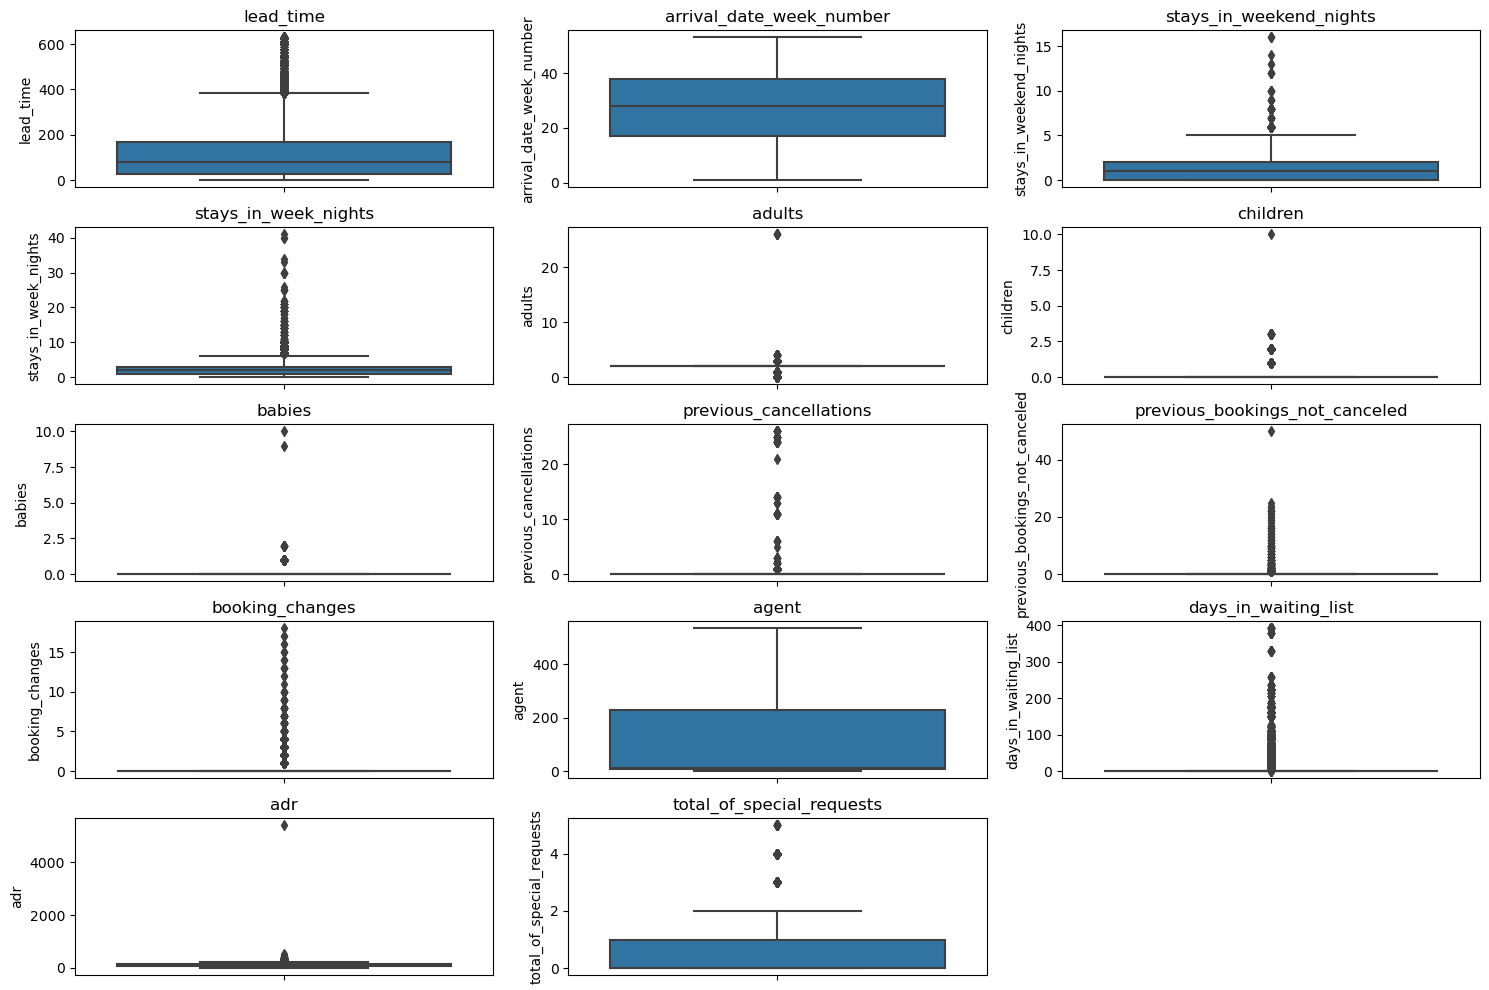

In [107]:
#aykırı değerleri her bir sürekli sütunlar için görselleştiriyoruz.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))  # Grafiğin boyutunu
for i, column in enumerate(data_cont.columns):
    plt.subplot((len(data_cont.columns) + 2) // 3, 3, i + 1)  # 3 sütunlu bir düzen oluştur
    sns.boxplot(y=data_cont[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

Görüldüğü üzere tüm sürekli değişkenleri incelediğimizde çok fazla aykırı değer olduğunu görüyoruz. Tüm değişkenkenler için outliers analizi yapmak sağlıklı bir yaklaşım olmayabilir. Her bir sütun için aykırı değer tespiti, sütunların içeriğine ve analiz amacınıza bağlı olarak değişir. Bu veri seti için detaylı bir inceleme yapacak olursak;

lead_time: Rezervasyonun yapıldığı tarihten itibaren geçen gün sayısını gösterir. Bu sütunda yüksek değerler aykırı olabilir ancak bu, özellikle turizm sektöründe bazı durumlar için normal olabilir (örneğin, uzun vadeli planlama yapanlar).

arrival_date_week_number, stays_in_weekend_nights, stays_in_week_nights: Bunlar, varış tarihi, hafta sonu ve hafta içi konaklamalar gibi zaman ile ilgili verilerdir. Bu sütunlarda aykırı değerlerin olup olmadığını tespit etmek önemli olabilir, ancak bu tür veriler genellikle belli bir aralıkta yer aldığı için aykırı değerler gerçek dünya senaryolarını yansıtıyor olabilir.

adults, children, babies: Bu sütunlar rezervasyon yapan yetişkin, çocuk ve bebek sayılarını gösterir. Çok yüksek sayılar gerçek dışı görünebilir ve bu durum bir hata veya veri giriş sorununu işaret ediyor olabilir.

previous_cancellations, previous_bookings_not_canceled: Önceki iptal sayısı ve iptal edilmemiş rezervasyon sayısı gibi veriler de aykırı değer analizi için uygun olabilir. Normalden çok yüksek iptal veya rezervasyon sayıları bazı kullanıcılar için şüpheli aktivite işareti olabilir.

booking_changes: Rezervasyon değişikliklerinin sayısı, çok yüksek değerlerle aykırı olabilir. Çok sayıda değişiklik, sistematik sorunları veya bireysel davranış farklılıklarını gösterebilir.

agent, days_in_waiting_list, adr, total_of_special_requests: Bu tür sütunlar, aykırı değer tespiti için oldukça uygun olabilir. Örneğin, çok yüksek adr (ortalama günlük oran) değerleri, hatalı veri girişlerini veya olağandışı durumları gösterebilir.

Sonuç olarak; aykırı değer analizi yapılmasını önerdiğim sütunlar şunlardır;:

lead_time: Bu sütun, rezervasyon yapıldıktan sonra geçen süreyi gösterir. Çok uzun lead_time değerleri, olağan dışı rezervasyon davranışlarını veya veri giriş hatalarını işaret edebilir.

adr (Average Daily Rate): Bu sütun, bir rezervasyonun ortalama günlük ücretini ifade eder. Hem çok düşük hem de çok yüksek adr değerleri, fiyatlandırma hatalarını, veri giriş hatalarını veya olağandışı fiyatlandırma stratejilerini gösterebilir.

adults, children, babies: Bu sütunlar, rezervasyon yapan yetişkin, çocuk ve bebek sayısını gösterir. Olağan dışı yüksek kişi sayıları, hatalı girişler veya belki sistemsel hataları işaret edebilir.

previous_cancellations: Önceki iptal sayısı, bazı durumlarda anormal olarak yüksek olabilir. Çok yüksek iptal sayıları, potansiyel olarak dolandırıcılık veya sistemsel sorunları gösterebilir.

booking_changes: Rezervasyonlarda yapılan değişiklik sayısı. Normal operasyonlar dışında yüksek bir değişiklik sayısı, kullanıcı davranışlarındaki olağandışılıkları veya operasyonel sorunları ortaya çıkarabilir.

total_of_special_requests: Müşteriler tarafından yapılan özel isteklerin sayısı. Çok yüksek değerler, belirli müşteri taleplerinin anormal olduğunu veya belki de sistem hatalarını gösterebilir.

Bu sütunlar için aykırı değer analizi yapmak, veri setinizin genel kalitesini artırabilir ve analiz sonuçlarınızın daha güvenilir olmasını sağlayabilir.

In [108]:
selected_columns = ['lead_time', 'adr', 'adults', 'children', 'babies', 'previous_cancellations', 'booking_changes', 'total_of_special_requests']

# IQR yöntemiyle aykırı değer tespiti
Q1 = data_cont[selected_columns].quantile(0.25)
Q3 = data_cont[selected_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = (data_cont[selected_columns] < (Q1 - 1.5 * IQR)) | (data_cont[selected_columns] > (Q3 + 1.5 * IQR))
outlier_counts = outliers.sum()
print("Aykırı Değer Sayısı Her Sütun İçin:")
print(outlier_counts)

Aykırı Değer Sayısı Her Sütun İçin:
lead_time                     2576
adr                           3514
adults                       21822
children                      7893
babies                         764
previous_cancellations        5555
booking_changes              14249
total_of_special_requests     2533
dtype: int64


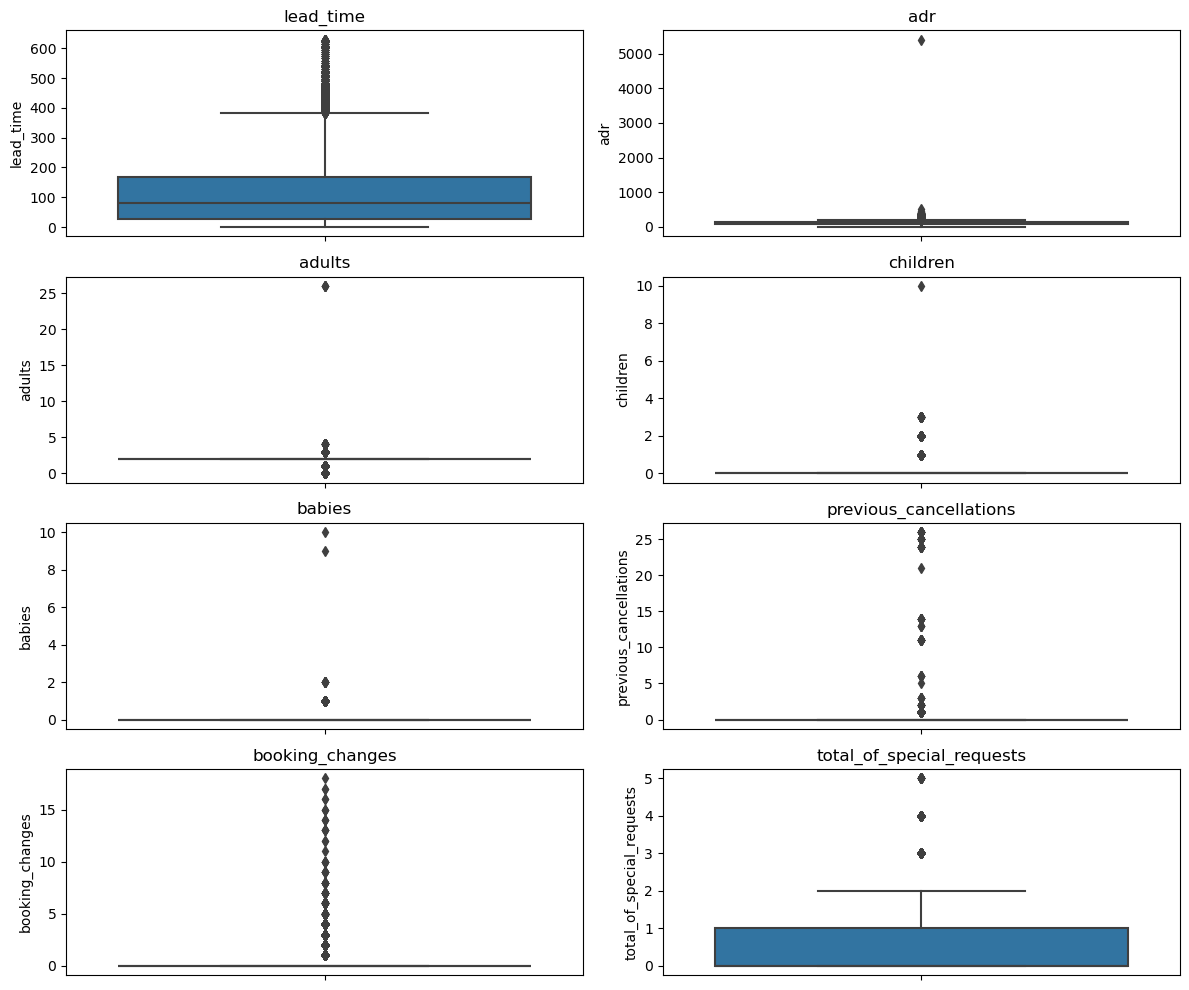

In [109]:
plt.figure(figsize=(12, 10))  # Grafiğin boyutu
for i, column in enumerate(selected_columns):
    plt.subplot((len(selected_columns) + 1) // 2, 2, i + 1)  # 2 sütunlu bir düzen oluşturur
    sns.boxplot(y=data_cont[column])
    plt.title(column)
    plt.tight_layout()
plt.show()

Baktığımız zaman aykırı değerlerin sayısı gerçekten fazla. Normalde böyle bi durumda daha detaylı bir inceleme yapmalı ve aykırı değerleri düzeltirken bilgi kaybına sebep olmamak için aykırı değerleri düzeltme yoluna gidilebilir. Ancak bu çalışma pre-processing için bir örnek teşkil ettiğinden, kolaylık olsun diye aykırı değerleri veri setinden sileceğim.

veri setinden aykırı değerleri silerken, kategorik, sürekli ve tarih olarak ayırdığımız veri setlerinden de bu değerleri silmeyi unutmamalıyız.

In [110]:
# Aykırı değer içeren indeksleri bulalım
outlier_indices = set(outliers[outliers.any(axis=1)].index)

# Aykırı değer içeren indeksleri tüm veri setlerinden kaldıralım
data_cont_clean = data_cont.drop(index=outlier_indices)
data_cat_clean = data_cat.drop(index=outlier_indices)
data_date_clean = data_date.drop(index=outlier_indices)

In [111]:
#Doğru şekilde silme işlemi yapıp yapmadığımızı kontrol ediyoruz. 
print(data_cont_clean.shape)
print(data_cat_clean.shape)
print(data_date_clean.shape)

(57449, 14)
(57449, 13)
(57449, 2)


In [112]:
data_cont=data_cont_clean
data_cat=data_cat_clean
data_date=data_date_clean

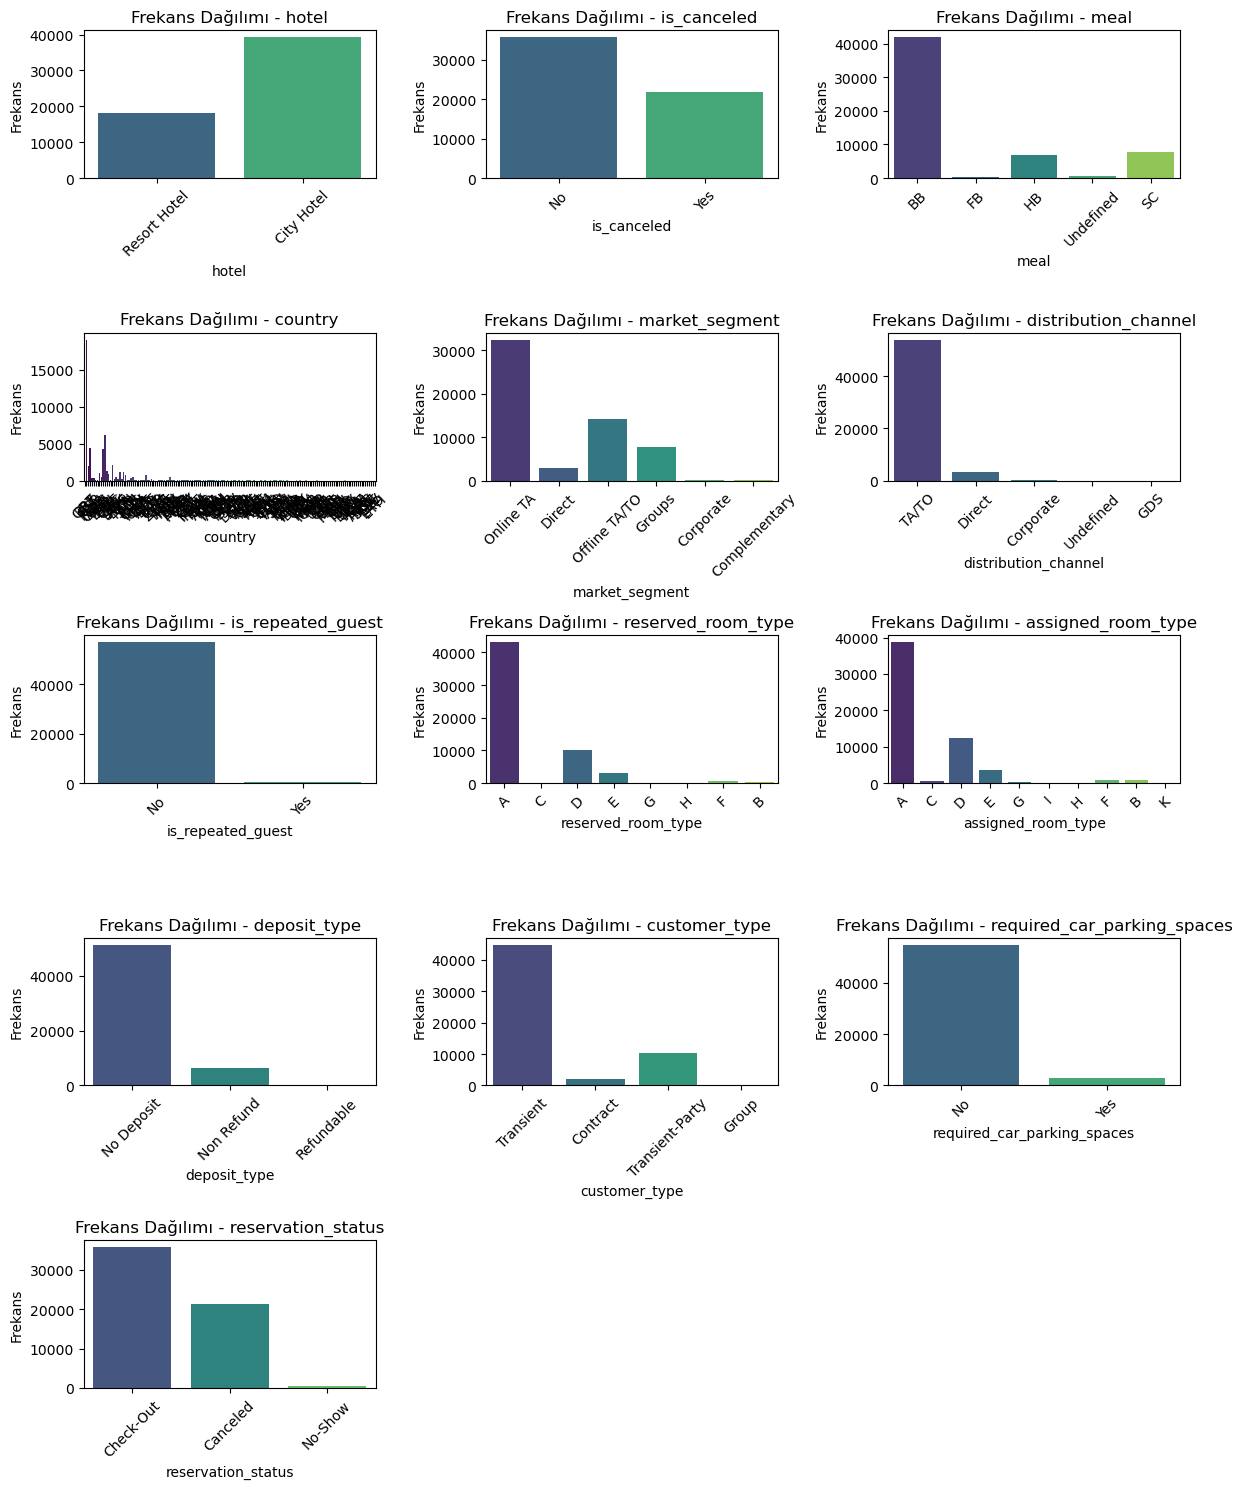

In [113]:
#Tüm kategorik sütunlar için görselleştirme yapalım
# Grafiği oluşturacak toplam sütun ve satır sayısını belirleyelim
n_cols = 3
n_rows = (len(data_cat.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 3))  # Her subplot için daha küçük boyutlar belirleyin

for i, column in enumerate(data_cat.columns):
    plt.subplot(n_rows, n_cols, i + 1)  # n_rows ve n_cols ile subplot düzeni oluştur
    sns.countplot(x=data_cat[column], palette='viridis')  # Seaborn countplot kullan
    plt.title(f'Frekans Dağılımı - {column}')
    plt.ylabel('Frekans')
    plt.xlabel(column)
    plt.xticks(rotation=45)  # Eğer kategori isimleri uzunsa, etiketleri döndür

plt.tight_layout()  # Grafikler arası boşlukları otomatik ayarla
plt.show()

In [114]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
#Kodları çalıştırırken gelen uyarıları kapatmak için bu kodları kullanabiliriz

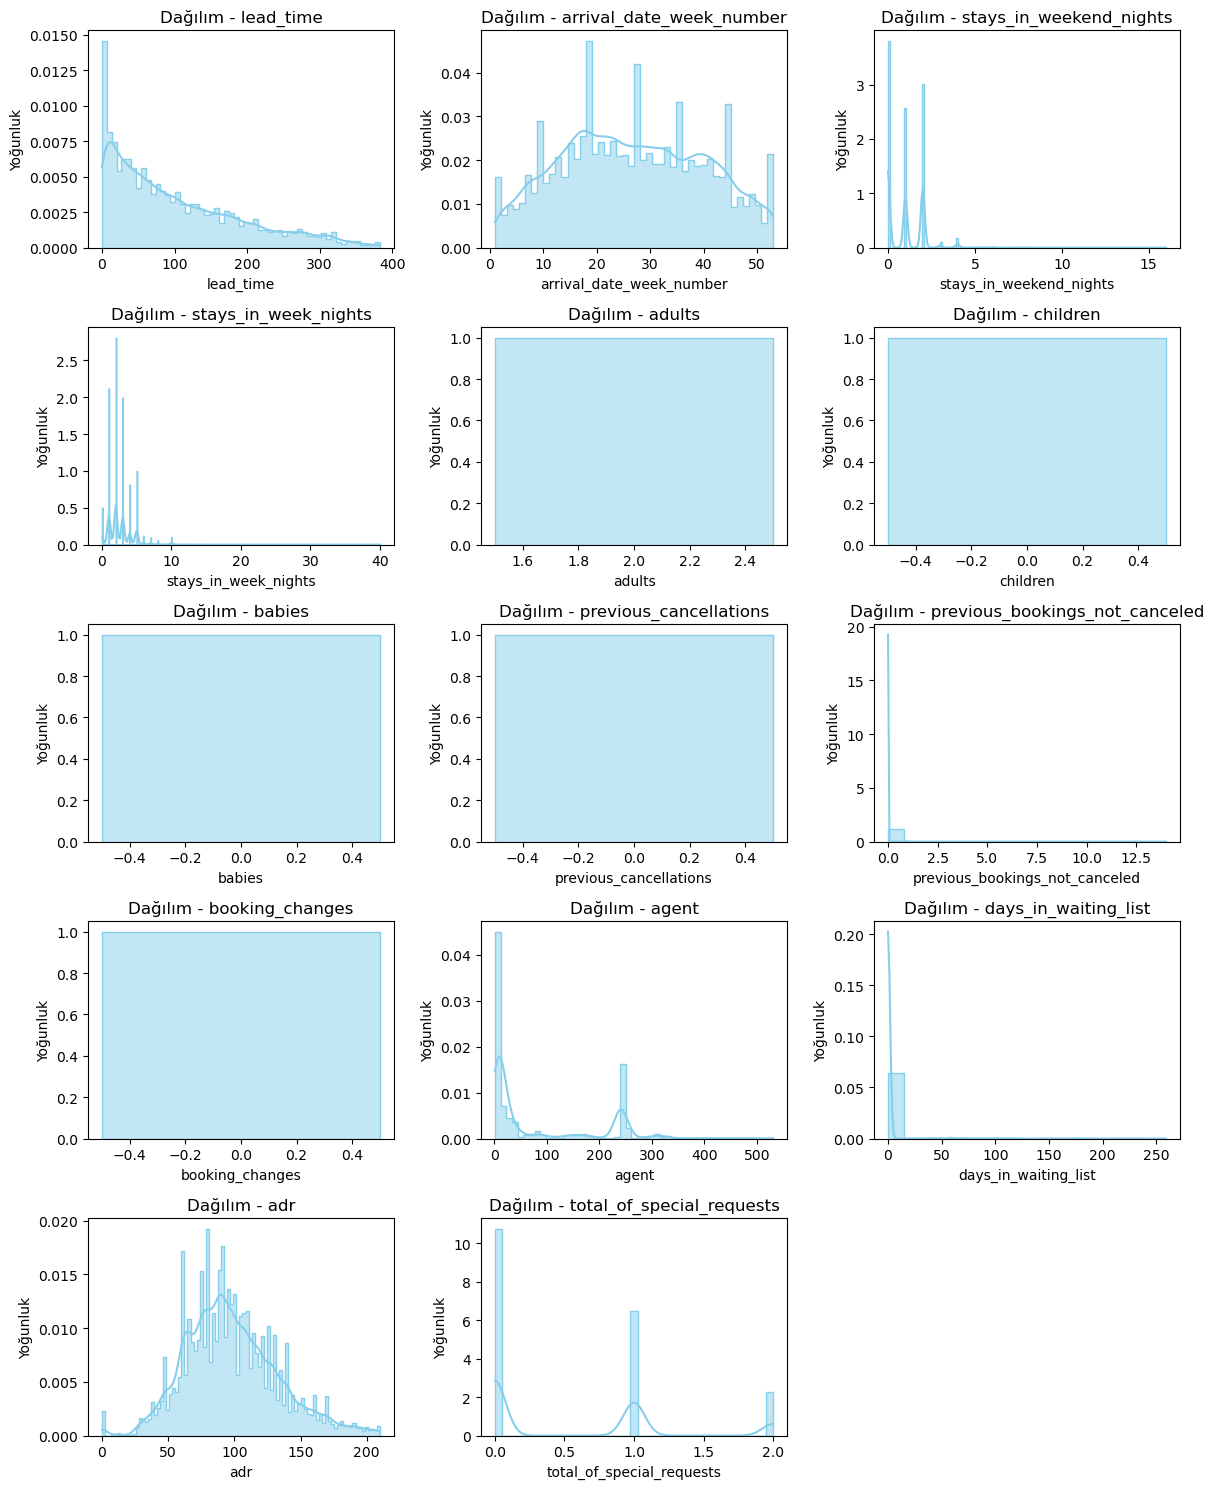

In [115]:
#Tüm sürekli sürunlar için görselleştirme yapalım
# Grafiği oluşturacak toplam sütun ve satır sayısını belirleyelim

n_cols = 3
n_rows = (len(data_cont.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 3))  # Her subplot için boyutlar belirleme

for i, column in enumerate(data_cont.columns):
    plt.subplot(n_rows, n_cols, i + 1)  # n_rows ve n_cols ile subplot düzeni oluşturur
    sns.histplot(data_cont[column], kde=True, color='skyblue', element='step', stat='density')  # Histogram ve yoğunluk eğrisi
    plt.title(f'Dağılım - {column}')
    plt.xlabel(column)
    plt.ylabel('Yoğunluk')

plt.tight_layout()  # Grafikler arası boşlukları otomatik ayarlar
plt.show()

Normalizasyon, farklı özelliklerin ölçeklerini standartlaştırarak veri setlerindeki varyansları eşitlemek için kritik bir ön işlemedir. Bu işlem, özellikle çeşitli makine öğrenmesi algoritmaları (örneğin, gradient descent kullanan yöntemler ve mesafe tabanlı algoritmalar gibi) tarafından verilerin daha etkin bir şekilde işlenmesini sağlar. 

Normalizasyon, her bir özelliğin model üzerindeki etkisini dengeler, böylece daha hızlı ve daha doğru sonuçlar elde edilmesine olanak tanır. Ayrıca, algoritmaların daha hızlı ve kararlı bir şekilde yakınsamasına yardımcı olur, böylece daha kısa sürede daha iyi performans göstermelerini sağlar.

In [116]:
#Veri setimizde sürekli değişkenleri normalize edelim. Bunu yaparken sklearn kütüphanesini kullanabiliriz

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
scaler = StandardScaler()
# Verileri normalize eder
data_cont_normalized = scaler.fit_transform(data_cont)

# Normalize edilmiş verileri DataFrame'e dönüştürür
data_cont_normalized = pd.DataFrame(data_cont_normalized, columns=data_cont.columns)

StandardScaler Scikit-learn kütüphanesinde yer alan bir normalizasyon yöntemidir ve özellikle Z-Skoru normalizasyonu olarak da bilinir. Bu yöntem, her bir özelliği (feature) ortalaması 0 ve standart sapması 1 olacak şekilde ölçekler.

Matematiksel olarak bu işlem, her özelliğin değerlerinden özelliğin ortalamasını çıkartıp, sonucu özelliğin standart sapmasına bölmek şeklinde ifade edilir.

In [119]:
data_cont_normalized.head(5)

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,total_of_special_requests
0,-0.982257,0.018098,-1.005965,-0.334998,0.0,0.0,0.0,0.0,-0.047739,0.0,1.399913,-0.151783,0.007973,0.629341
1,-0.982257,0.018098,-1.005965,-0.334998,0.0,0.0,0.0,0.0,-0.047739,0.0,1.399913,-0.151783,0.007973,0.629341
2,-1.037720,0.018098,-1.005965,-0.334998,0.0,0.0,0.0,0.0,-0.047739,0.0,1.970001,-0.151783,0.150346,0.629341
3,-0.194676,0.018098,-1.005965,0.188683,0.0,0.0,0.0,0.0,-0.047739,0.0,1.399913,-0.151783,-0.447621,0.629341
4,-0.305602,0.018098,-1.005965,0.188683,0.0,0.0,0.0,0.0,-0.047739,0.0,-0.636116,-0.151783,0.221533,-0.816108


Kategorik verileri makine öğrenmesi algoritmalarına girdi olarak tanımlamalıyız. Bu tür verileri sayısal verilere dönüştürmemiz lazım. Bunu yaparken çeşitli yöntemler mevcuttur. Bazı yöntemleri websitemdeki yazıda açıkladım, buradan ulaşabilirsiniz:
https://umutcindiloglu.com/3-veri-on-islemede-en-sik-kullanilan-10-teknik/

Bu uygulamada LabelEncoding kullanacağız. 

Label Encoding işlemi, kategorik verilerinizi sayısal değerlere dönüştürmek için kullanılan bir yöntemdir. Her benzersiz kategoriye, ardışık sayılar atanır. Bu işlem, bazı makine öğrenmesi algoritmaları tarafından gerekli olan sayısal girdi formatını sağlar. Burada Python'un sklearn.preprocessing modülündeki LabelEncoder sınıfını kullanacağız.

In [120]:
from sklearn.preprocessing import LabelEncoder

In [121]:
label_encoders = {}
for column in data_cat.columns:
    le = LabelEncoder()
    data_cat.loc[:, column] = le.fit_transform(data_cat[column])  # .loc kullanarak güvenli bir şekilde atama yapın
    label_encoders[column] = le  # Encoder'ı sakla, ilerde ters dönüşüm için kullanılabilir

In [122]:
data_cat.head(5)

,hotel,is_canceled,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,required_car_parking_spaces,reservation_status
4,1,0,0,51,5,3,0,0,0,0,2,0,1
5,1,0,0,51,5,3,0,0,0,0,2,0,1
7,1,0,1,119,2,1,0,2,2,0,2,0,1
8,1,1,0,119,5,3,0,0,0,0,2,0,0
9,1,1,2,119,4,3,0,3,3,0,2,0,0


In [123]:
#Yukarıdaki işlemler sonucu veri setlerimizinn boyutunda değişiklik olmuş mu kontrol ediyoruz.
print(data_cont_normalized.shape)
print(data_cat.shape)
print(data_date.shape)

(57449, 14)
(57449, 13)
(57449, 2)


Tüm veri setlerimizi birleştirelim ve Train - Test olarak %80'e %20 bölelim.

In [147]:
from sklearn.model_selection import train_test_split

# İndeksleri sıfırla
data_cont_normalized.reset_index(drop=True, inplace=True)
data_cat.reset_index(drop=True, inplace=True)
data_date.reset_index(drop=True, inplace=True)

# Veri setlerini yeniden birleştir
data_final = pd.concat([data_cont_normalized, data_cat, data_date], axis=1)

# Eğitim ve test setlerine ayırma işlemi
train, test = train_test_split(data_final, test_size=0.20, random_state=42)

# Eğitim ve test setlerinin boyutunu göster
print("Eğitim seti boyutu:", train.shape)
print("Test seti boyutu:", test.shape)

Eğitim seti boyutu: (45959, 29)
Test seti boyutu: (11490, 29)


In [152]:
data_final.head(5)

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,...,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,required_car_parking_spaces,reservation_status,arrival_date,reservation_status_date
0,-0.982257,0.018098,-1.005965,-0.334998,0.0,0.0,0.0,0.0,-0.047739,0.0,...,3,0,0,0,0,2,0,1,2015-07-01,2015-07-03
1,-0.982257,0.018098,-1.005965,-0.334998,0.0,0.0,0.0,0.0,-0.047739,0.0,...,3,0,0,0,0,2,0,1,2015-07-01,2015-07-03
2,-1.037720,0.018098,-1.005965,-0.334998,0.0,0.0,0.0,0.0,-0.047739,0.0,...,1,0,2,2,0,2,0,1,2015-07-01,2015-07-03
3,-0.194676,0.018098,-1.005965,0.188683,0.0,0.0,0.0,0.0,-0.047739,0.0,...,3,0,0,0,0,2,0,0,2015-07-01,2015-05-06
4,-0.305602,0.018098,-1.005965,0.188683,0.0,0.0,0.0,0.0,-0.047739,0.0,...,3,0,3,3,0,2,0,0,2015-07-01,2015-04-22


Train ve Test veri setlerinde bağımlı değişken Y'yi (is_canceled) ve diğer X değişkenlerini ayıralım.

In [148]:
# Eğitim setinden bağımlı ve bağımsız değişkenleri ayır
X_train = train.drop('is_canceled', axis=1)  # 'is_canceled' sütunu hariç tüm veriler
y_train = train['is_canceled']  # Sadece 'is_canceled' sütunu

# Test setinden bağımlı ve bağımsız değişkenleri ayır
X_test = test.drop('is_canceled', axis=1)  # 'is_canceled' sütunu hariç tüm veriler
y_test = test['is_canceled']  # Sadece 'is_canceled' sütunu

# Ayırdığınız veri setlerinin boyutlarını kontrol etmek isteyebilirsiniz
print("Eğitim seti X:", X_train.shape)
print("Eğitim seti Y:", y_train.shape)
print("Test seti X:", X_test.shape)
print("Test seti Y:", y_test.shape)

Eğitim seti X: (45959, 28)
Eğitim seti Y: (45959,)
Test seti X: (11490, 28)
Test seti Y: (11490,)


--------------------------SON------------------------

Önemli Not: Bu veri setinde daha birçok ön işleme işlemleri yapılmasına ihtiyaç vardır. Makine öğrenmesi yapılacak nihai veri setinin bu olduğunu düşünmüyorum.

Bu çalışmayı örnek teşkil etmesi açısından gerçekleştirdim. 

Faydalı olması dileğiyle...